In [21]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
%matplotlib inline

lib_path = r'/Users/miaoyuesun/Code_Workspace/github-workspace-2-28-2019/backtester/brad_vbacktester/'
file_path = '/Users/miaoyuesun/Code_Workspace/github-workspace-2-28-2019/backtester/brad_vbacktester/'
j9000_file = "j9000_hr.csv"
jm000_file = "jm000_hr.csv"

from sys import path
path.append(lib_path) #将存放module的路径添加进来

from metrics import expected_returns, win_loss_rate
from performance import sngl_performance
from data import process_sngl_data
from plot import plot_cum_returns
from strategies import Strat_SMA
from indicators import MACD

In [4]:
j9000 = process_sngl_data(file_path, j9000_file)

In [39]:
j9000.head(10)

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD
date,,,,,,,,,,,,
2011-04-15 09:00:00,2011/4/15 9:00,2275.0,2285.0,2250.0,2260.0,31834,6134,2260.000000,2260.000000,0.000000,0.000000,0.000000
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.833333,2257.923077,-0.089744,-0.049858,-0.039886
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2253.995381,2254.357812,-0.362431,-0.177961,-0.184469
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2249.577586,2250.343995,-0.766409,-0.377300,-0.389109
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2249.692355,2250.264221,-0.571867,-0.435179,-0.136688
2011-04-18 09:00:00,2011/4/18 9:00,2239.0,2331.0,2237.0,2331.0,30768,13342,2269.454390,2266.434954,3.019436,0.501214,2.518222
2011-04-18 10:00:00,2011/4/18 10:00,2330.0,2368.0,2330.0,2345.0,30238,16404,2286.312129,2280.407340,5.904789,1.868714,4.036074
2011-04-18 11:00:00,2011/4/18 11:00,2346.0,2351.0,2330.0,2348.0,11708,15230,2299.185436,2291.298192,7.887244,3.315080,4.572164
2011-04-18 13:00:00,2011/4/18 13:00,2344.0,2386.0,2336.0,2375.0,28142,20388,2314.184256,2303.704638,10.479618,4.970124,5.509494


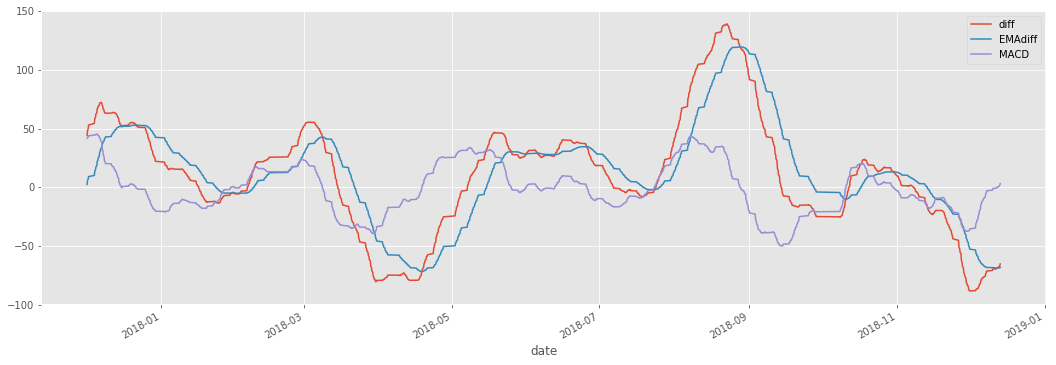

In [42]:
j9000_macd = MACD(j9000, 'close', 120, 260, 90)
j9000_macd[['diff', 'EMAdiff', 'MACD']].tail(2000).plot(figsize = (18, 6))

# Locate the signal change

In [43]:
j9000_macd['signal'] = j9000_macd['MACD'].apply(lambda x: 1 if x>0 else -1 if x < 0 else 0)

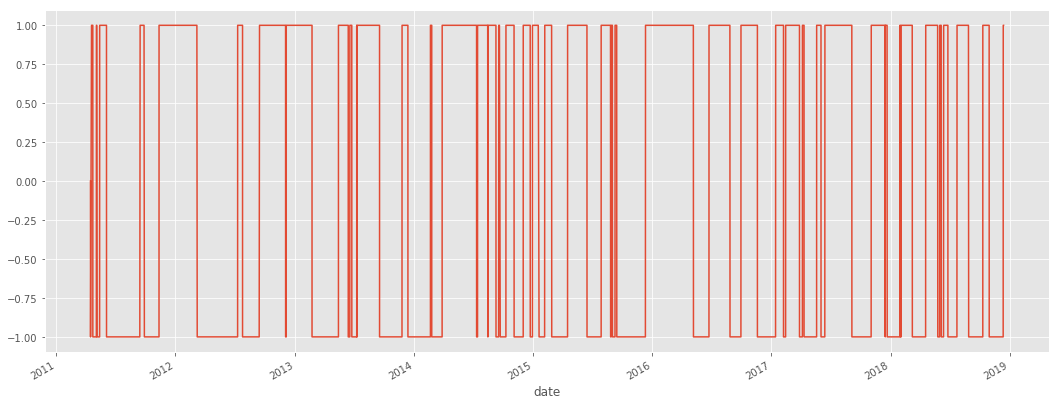

In [45]:
j9000_macd['signal'].plot(figsize = (18, 7))

In [114]:
j9000_macd.head()

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD,signal,next_signal,signal_chg
date,,,,,,,,,,,,,,,
2011-04-15 09:00:00,2011/4/15 9:00,2275.0,2285.0,2250.0,2260.0,31834,6134,2260.000000,2260.000000,0.000000,0.000000,0.000000,0,NaN,NaN
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.983333,2257.992308,-0.008974,-0.004537,-0.004437,-1,0.0,-1.0
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2254.599940,2254.635884,-0.035945,-0.015240,-0.020705,-1,-1.0,0.0
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2250.858203,2250.934587,-0.076384,-0.031039,-0.045345,-1,-1.0,0.0
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2250.680793,2250.744783,-0.063989,-0.037925,-0.026064,-1,-1.0,0.0


In [41]:
j9000_macd.head()

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD
date,,,,,,,,,,,,
2011-04-15 09:00:00,2011/4/15 9:00,2275.0,2285.0,2250.0,2260.0,31834,6134,2260.000000,2260.000000,0.000000,0.000000,0.000000
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.833333,2257.923077,-0.089744,-0.049858,-0.039886
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2253.995381,2254.357812,-0.362431,-0.177961,-0.184469
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2249.577586,2250.343995,-0.766409,-0.377300,-0.389109
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2249.692355,2250.264221,-0.571867,-0.435179,-0.136688


In [48]:
j9000_macd['next_signal'] = j9000_macd['signal'].shift(1)

In [50]:
j9000_macd['signal_chg'] = j9000_macd['signal'] - j9000_macd['next_signal']

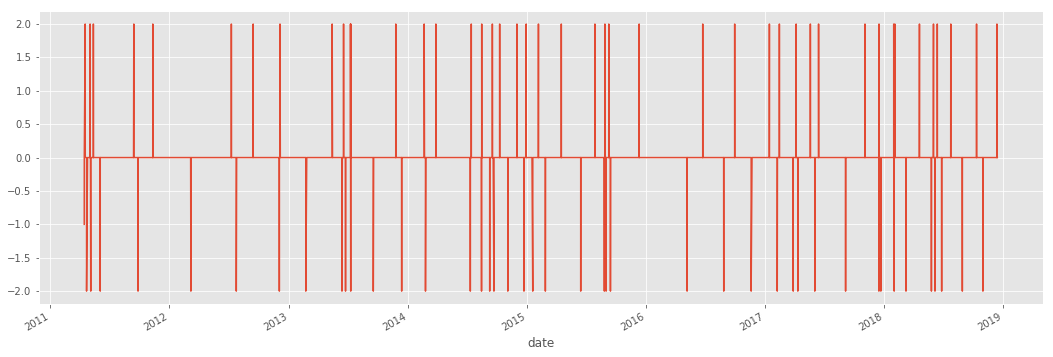

In [52]:
j9000_macd['signal_chg'].plot(figsize=(18, 6))

In [54]:
j9000_macd_sample = j9000_macd.head(500)

In [61]:
j9000_macd_sample.dropna(inplace=True)

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
j9000_macd_sample['date'].unique()

array(['2011/4/15 10:00', '2011/4/15 11:00', '2011/4/15 13:00',
       '2011/4/15 14:00', '2011/4/18 9:00', '2011/4/18 10:00',
       '2011/4/18 11:00', '2011/4/18 13:00', '2011/4/18 14:00',
       '2011/4/19 9:00', '2011/4/19 10:00', '2011/4/19 11:00',
       '2011/4/19 13:00', '2011/4/19 14:00', '2011/4/20 9:00',
       '2011/4/20 10:00', '2011/4/20 11:00', '2011/4/20 13:00',
       '2011/4/20 14:00', '2011/4/21 9:00', '2011/4/21 10:00',
       '2011/4/21 11:00', '2011/4/21 13:00', '2011/4/21 14:00',
       '2011/4/22 9:00', '2011/4/22 10:00', '2011/4/22 11:00',
       '2011/4/22 13:00', '2011/4/22 14:00', '2011/4/25 9:00',
       '2011/4/25 10:00', '2011/4/25 11:00', '2011/4/25 13:00',
       '2011/4/25 14:00', '2011/4/26 9:00', '2011/4/26 10:00',
       '2011/4/26 11:00', '2011/4/26 13:00', '2011/4/26 14:00',
       '2011/4/27 9:00', '2011/4/27 10:00', '2011/4/27 11:00',
       '2011/4/27 13:00', '2011/4/27 14:00', '2011/4/28 9:00',
       '2011/4/28 10:00', '2011/4/28 11:00', '201

In [71]:
date_dict = {}
for i, signal_chg in enumerate(j9000_macd_sample['signal_chg']):
    if j9000_macd_sample['signal_chg'][i] != 0:
        date_dict[j9000_macd_sample['date'][i]] = j9000_macd_sample['signal_chg'][i]

In [72]:
j9000_macd_sample.head(10)

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD,signal,next_signal,signal_chg
date,,,,,,,,,,,,,,,
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.983333,2257.992308,-0.008974,-0.004537,-0.004437,-1,0.0,-1.0
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2254.599940,2254.635884,-0.035945,-0.015240,-0.020705,-1,-1.0,0.0
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2250.858203,2250.934587,-0.076384,-0.031039,-0.045345,-1,-1.0,0.0
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2250.680793,2250.744783,-0.063989,-0.037925,-0.026064,-1,-1.0,0.0
2011-04-18 09:00:00,2011/4/18 9:00,2239.0,2331.0,2237.0,2331.0,30768,13342,2264.631245,2264.379194,0.252050,0.013128,0.238922,1,-1.0,2.0
2011-04-18 10:00:00,2011/4/18 10:00,2330.0,2368.0,2330.0,2345.0,30238,16404,2276.694463,2276.163932,0.530530,0.092061,0.438470,1,1.0,0.0
2011-04-18 11:00:00,2011/4/18 11:00,2346.0,2351.0,2330.0,2348.0,11708,15230,2286.136181,2285.387049,0.749132,0.180723,0.568409,1,1.0,0.0
2011-04-18 13:00:00,2011/4/18 13:00,2344.0,2386.0,2336.0,2375.0,28142,20388,2296.680877,2295.653151,1.027725,0.283414,0.744311,1,1.0,0.0
2011-04-18 14:00:00,2011/4/18 14:00,2375.0,2389.0,2366.0,2382.0,32780,19940,2305.866776,2304.589783,1.276993,0.392999,0.883995,1,1.0,0.0


In [145]:
date_dict

{'2011/4/15 10:00': -1.0,
 '2011/4/18 9:00': 2.0,
 '2011/4/22 14:00': -2.0,
 '2011/5/13 11:00': 2.0,
 '2011/5/3 11:00': 2.0,
 '2011/5/5 9:00': -2.0,
 '2011/6/3 13:00': -2.0}

In [137]:
dates = list(date_dict.keys())

In [149]:
dates_df = pd.DataFrame(dates)

In [150]:
dates_df.columns = ['dates']

In [152]:
dates_df.index = dates_df['dates']

In [155]:
dates_df.sort_index()

,dates
dates,
2011/4/15 10:00,2011/4/15 10:00
2011/4/18 9:00,2011/4/18 9:00
2011/4/22 14:00,2011/4/22 14:00
2011/5/13 11:00,2011/5/13 11:00
2011/5/3 11:00,2011/5/3 11:00
2011/5/5 9:00,2011/5/5 9:00
2011/6/3 13:00,2011/6/3 13:00


In [162]:
from datetime import datetime as dt

In [168]:
dates_df['dates'] = dates_df['dates'].apply(lambda x: dt.strptime(x, '%Y/%m/%d %H:%M'))

In [170]:
dates_df['dates'][0]

Timestamp('2011-04-15 10:00:00')

In [171]:
dates_dt = pd.to_datetime(dates_df['dates'])
# dates_df.sort_values('dates')

In [172]:
dates_dt

dates
2011/4/15 10:00   2011-04-15 10:00:00
2011/4/18 9:00    2011-04-18 09:00:00
2011/4/22 14:00   2011-04-22 14:00:00
2011/5/13 11:00   2011-05-13 11:00:00
2011/5/3 11:00    2011-05-03 11:00:00
2011/5/5 9:00     2011-05-05 09:00:00
2011/6/3 13:00    2011-06-03 13:00:00
Name: dates, dtype: datetime64[ns]

In [173]:
dates_df['dates_str'] = dates_df['dates'].astype(str)

In [174]:
dates_df

,dates,dates_str
dates,,
2011/4/15 10:00,2011-04-15 10:00:00,2011-04-15 10:00:00
2011/4/18 9:00,2011-04-18 09:00:00,2011-04-18 09:00:00
2011/4/22 14:00,2011-04-22 14:00:00,2011-04-22 14:00:00
2011/5/13 11:00,2011-05-13 11:00:00,2011-05-13 11:00:00
2011/5/3 11:00,2011-05-03 11:00:00,2011-05-03 11:00:00
2011/5/5 9:00,2011-05-05 09:00:00,2011-05-05 09:00:00
2011/6/3 13:00,2011-06-03 13:00:00,2011-06-03 13:00:00


In [108]:
dates.sort()

In [110]:
dates

['2011/4/15 10:00',
 '2011/4/18 9:00',
 '2011/4/22 14:00',
 '2011/5/13 11:00',
 '2011/5/3 11:00',
 '2011/5/5 9:00',
 '2011/6/3 13:00']

In [111]:
rng = range(len(dates)-1)

In [116]:
for i, date in enumerate(dates):
    try:
        print (dates[i], "to", dates[i+1])
        print (j9000_macd_sample[dates[i]:dates[i+1]]['MACD'].mean())
    except IndexError:
        pass

2011/4/15 10:00 to 2011/4/18 9:00
0.02847417191243141
2011/4/18 9:00 to 2011/4/22 14:00
0.475484741246469
2011/4/22 14:00 to 2011/5/13 11:00
-0.854481584221978
2011/5/13 11:00 to 2011/5/3 11:00
nan
2011/5/3 11:00 to 2011/5/5 9:00
0.12968097198591463
2011/5/5 9:00 to 2011/6/3 13:00
1.9136334241283048


In [113]:
rng

range(0, 6)